In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [3]:
len(data)

105

In [4]:
data.index = pd.to_datetime(data['Month'])
data.drop(columns='Month',inplace=True)
data.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [5]:
data.isna().sum()

Sales    0
dtype: int64

In [6]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

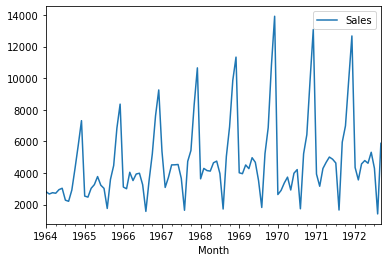

In [7]:
data.plot()

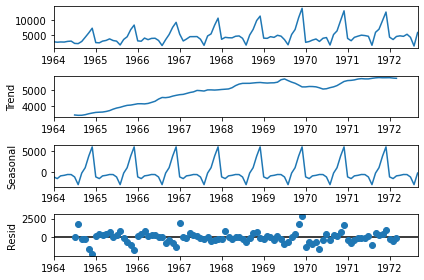

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(data, model="additive")
decompose_data.plot();

<AxesSubplot:xlabel='Month'>

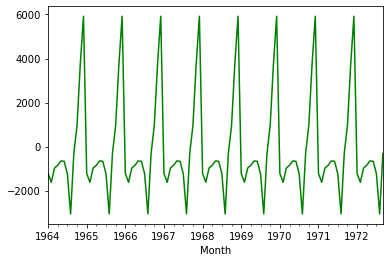

In [9]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

In [10]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.Sales, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.8335930563276297
2. P-Value :  0.3639157716602417
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 93
5. Critical Values :
	 1% :  -3.502704609582561
	 5% :  -2.8931578098779522
	 10% :  -2.583636712914788


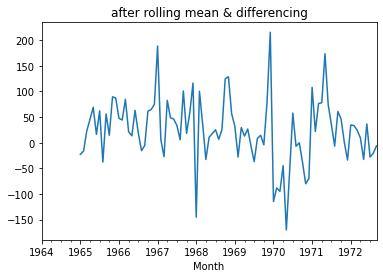

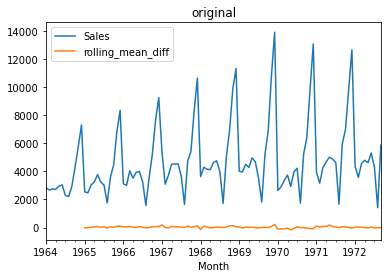

In [11]:
rolling_mean = data.rolling(window = 12).mean()
data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
data['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
data.plot(title='original');

In [13]:
rolling_mean.head(20)

,Sales
Month,
1964-01-01,NaN
1964-02-01,NaN
1964-03-01,NaN
1964-04-01,NaN
1964-05-01,NaN
1964-06-01,NaN
1964-07-01,NaN
1964-08-01,NaN
1964-09-01,NaN


In [15]:
data.head(20)

,Sales,rolling_mean_diff
Month,,
1964-01-01,2815,NaN
1964-02-01,2672,NaN
1964-03-01,2755,NaN
1964-04-01,2721,NaN
1964-05-01,2946,NaN
1964-06-01,3036,NaN
1964-07-01,2282,NaN
1964-08-01,2212,NaN
1964-09-01,2922,NaN


In [16]:
dftest = adfuller(data['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -7.626619157213173
2. P-Value :  2.0605796968135582e-11
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 92
5. Critical Values :
	 1% :  -3.503514579651927
	 5% :  -2.893507960466837
	 10% :  -2.583823615311909


In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
model=ARIMA(data['Sales'],order=(1,1,1))
history=model.fit()

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was

In [19]:
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Tue, 26 Oct 2021   AIC                           1910.251
Time:                        15:42:29   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7853     12.405      1.837      0.066      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

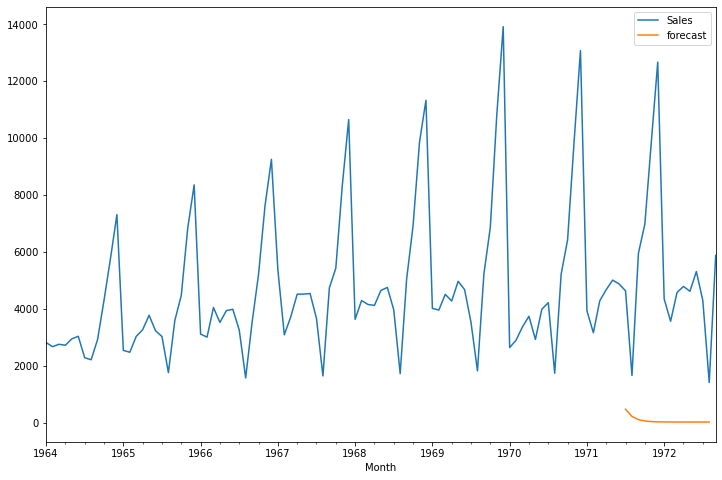

In [21]:
#data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
data['forecast']=history.predict(start=90,end=103,dynamic=True)
data[['Sales','forecast']].plot(figsize=(12,8))

In [22]:
model=ARIMA(data['rolling_mean_diff'].dropna(),order=(1,1,1))
model_fit=model.fit()

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was

<AxesSubplot:xlabel='Month'>

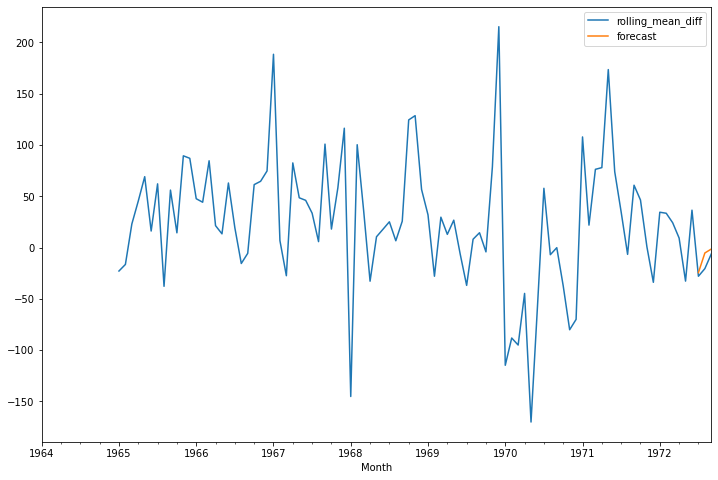

In [23]:
data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
data[['rolling_mean_diff','forecast']].plot(figsize=(12,8))

###  SARIMAX

In [24]:
import statsmodels.api as sm

In [25]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

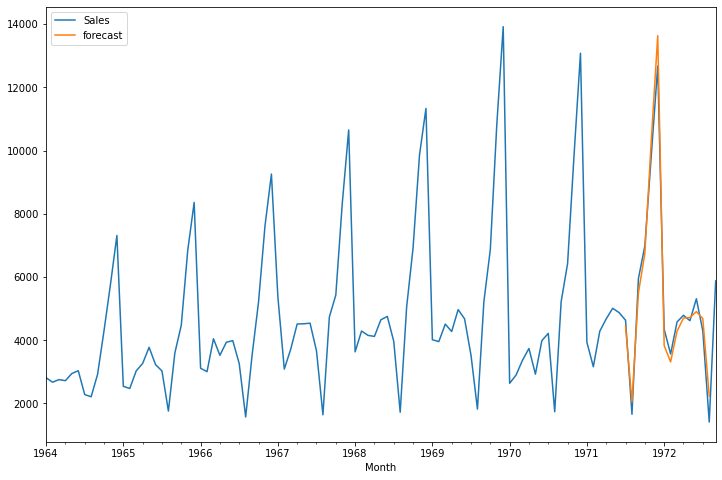

In [26]:
data['forecast']=results.predict(start=90,end=103,dynamic=True)
data[['Sales','forecast']].plot(figsize=(12,8))

In [27]:
from pandas.tseries.offsets import DateOffset
pred_date=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [29]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=data.columns)
pred_date

,Sales,rolling_mean_diff,forecast
1972-10-01,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN


In [30]:
data=pd.concat([data,pred_date])

In [31]:
data

,Sales,rolling_mean_diff,forecast
1964-01-01,2815,NaN,NaN
1964-02-01,2672,NaN,NaN
1964-03-01,2755,NaN,NaN
1964-04-01,2721,NaN,NaN
1964-05-01,2946,NaN,NaN
...,...,...,...
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN


<AxesSubplot:>

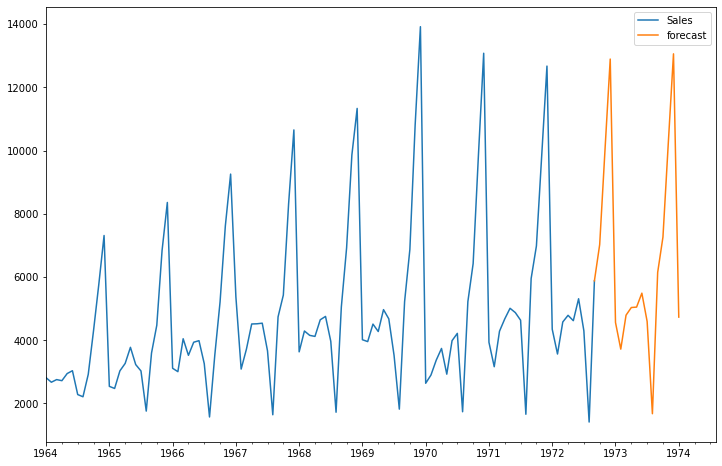

In [32]:
data['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
data[['Sales', 'forecast']].plot(figsize=(12, 8))